In [1]:
library(RCurl)
library(kernlab)

Loading required package: bitops


例2 訓練データの読み込み

In [2]:
url1 <- "https://raw.githubusercontent.com/Salinger/testset1/master/learning.csv"
learning_df <- read.csv(text=getURL(url1,ssl.verifypeer=FALSE, .encoding="UTF-8"))
head(learning_df)

,a,b,continued
1,98.61543,2.002748,1
2,89.61655,5.191399,1
3,108.4325,9.008627,1
4,101.7832,5.846009,1
5,102.9144,8.234045,1
6,97.66939,5.815231,1


訓練用データ

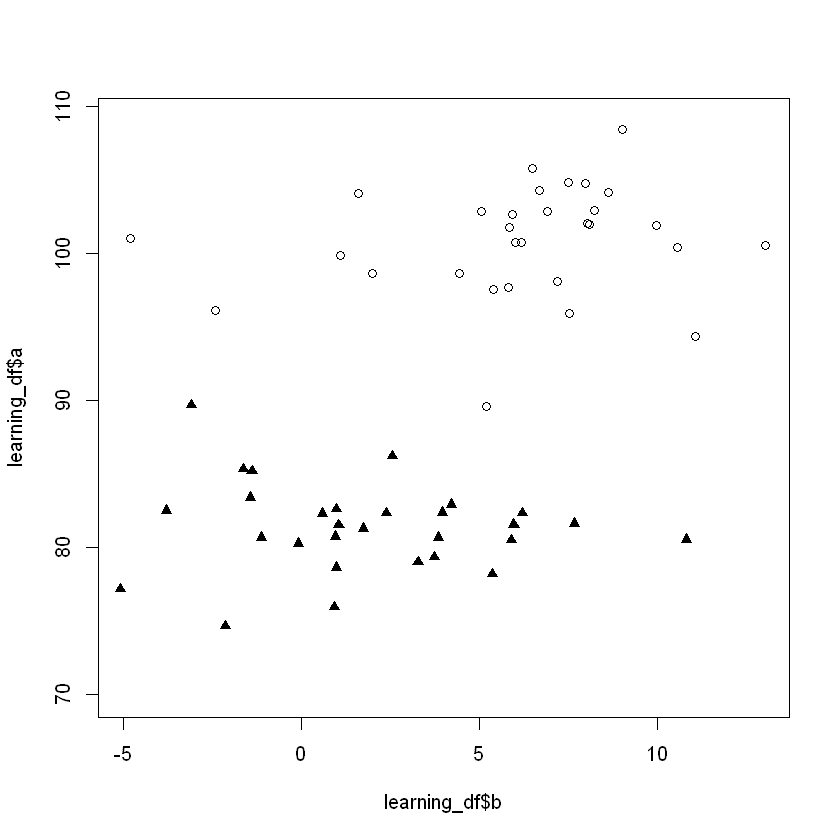

In [3]:
plot(x=learning_df$b,y=learning_df$a,
     xlim=c(-5,13),ylim=c(70,109),
     pch=ifelse(learning_df$continued==1,1,17))

例3 テストデータの読み込み

In [4]:
url2 <- "https://raw.githubusercontent.com/Salinger/testset1/master/try.csv"
test_df <- read.csv(text=getURL(url2,ssl.verifypeer=FALSE, .encoding="UTF-8"))
head(test_df)

,a,b
1,99.35977,7.094497
2,102.4152,4.42269
3,96.98385,8.328074
4,97.42253,10.96922
5,94.09512,11.96128
6,82.32846,6.213392


例4 SVMによる学習

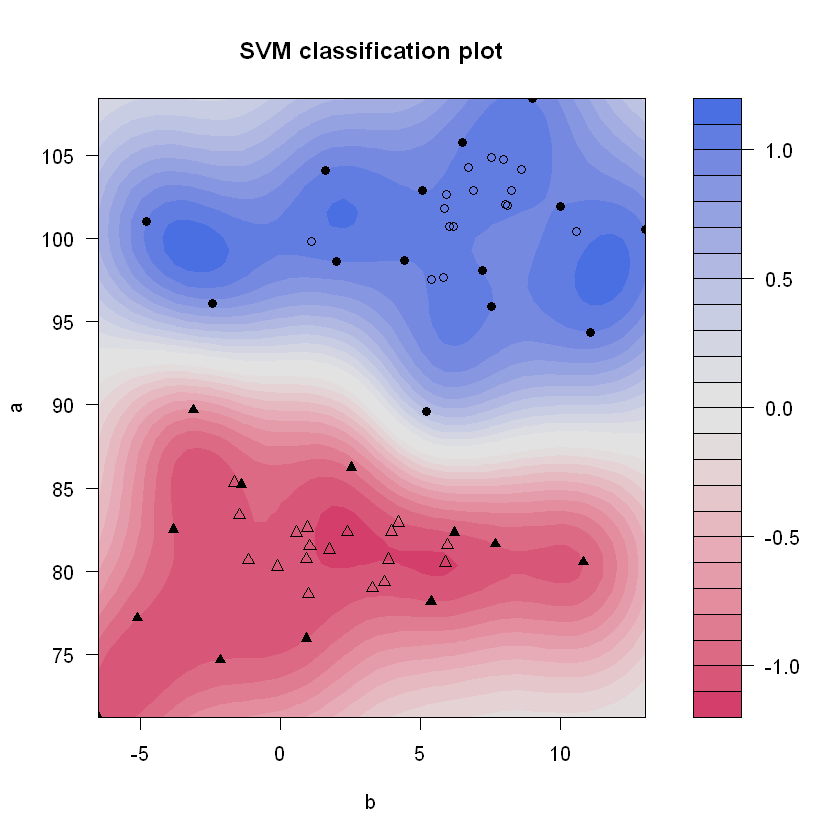

In [5]:
classifier <- ksvm(continued ~., data=learning_df, type="C-svc") #, kernel="radial")
plot(classifier, data=learning_df)

例5 予測

In [6]:
predict(classifier, test_df)

[1] 1 1 1 1 1 0 0 0 0 0

### 線形回帰モデル

例6 データの読み込み

In [7]:
data(freeny)

In [8]:
lm_result <- lm(freeny.y~time(freeny.y))
summary(lm_result)


Call:
lm(formula = freeny.y ~ time(freeny.y))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.051305 -0.014040  0.006104  0.014610  0.034788 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.080e+02  2.298e+00  -90.53   <2e-16 ***
time(freeny.y)  1.105e-01  1.168e-03   94.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02053 on 37 degrees of freedom
Multiple R-squared:  0.9959,	Adjusted R-squared:  0.9958 
F-statistic:  8944 on 1 and 37 DF,  p-value: < 2.2e-16


例7 結果のプロット

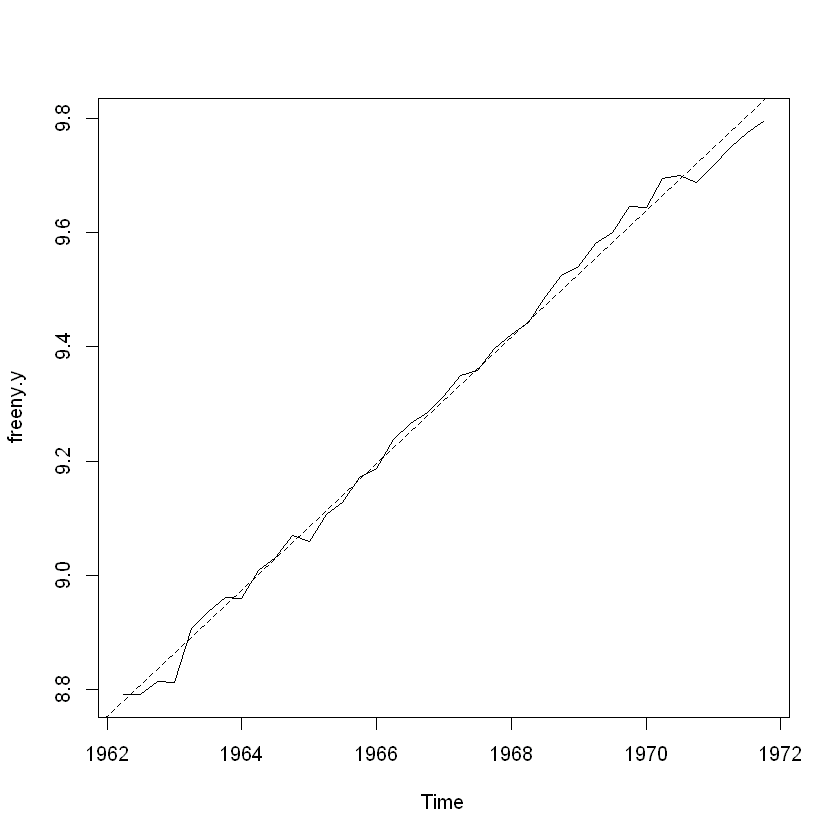

In [9]:
plot(freeny.y)
abline(lm_result, lty=2)

### ランダムフォレスト

例8 ライブラリとデータの読み込み

In [10]:
library("randomForest")
data(freeny)
df <- data.frame( "time"=time(freeny.y), "freeny.y"=freeny.y)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


例9 ランダムフォレストによる回帰

In [11]:
rf_result <- randomForest(freeny.y ~ ., df, mtry=1, ntree=500, type="regression")
print(rf_result)


Call:
 randomForest(formula = freeny.y ~ ., data = df, mtry = 1, ntree = 500,      type = "regression") 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.0006569921
                    % Var explained: 99.32


木の数と誤り率の関係

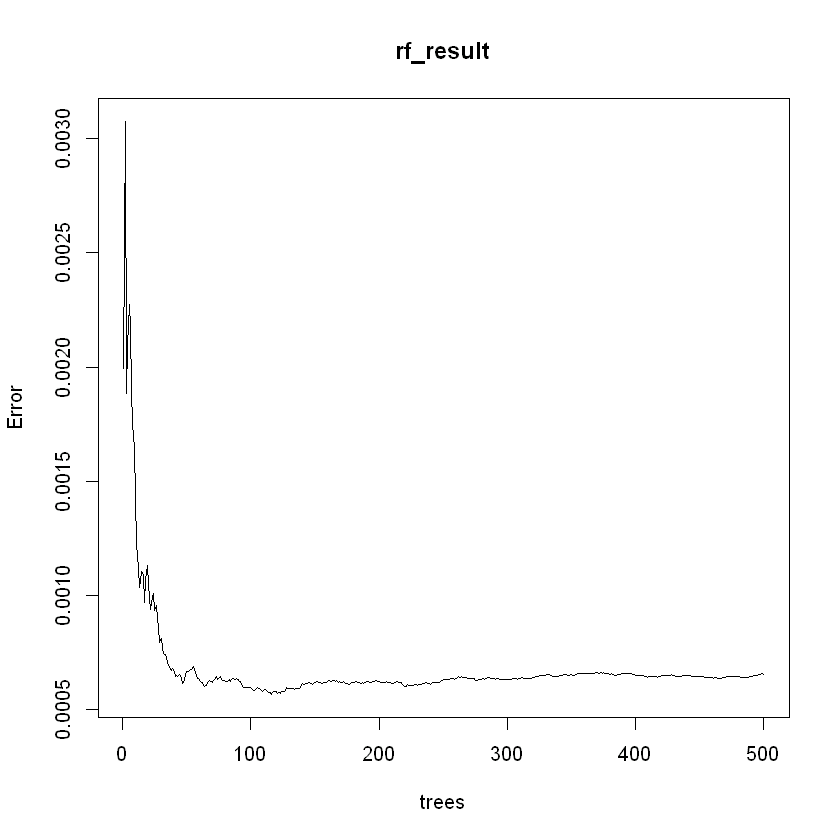

In [12]:
plot(rf_result)

例10 売上データの作成と描画

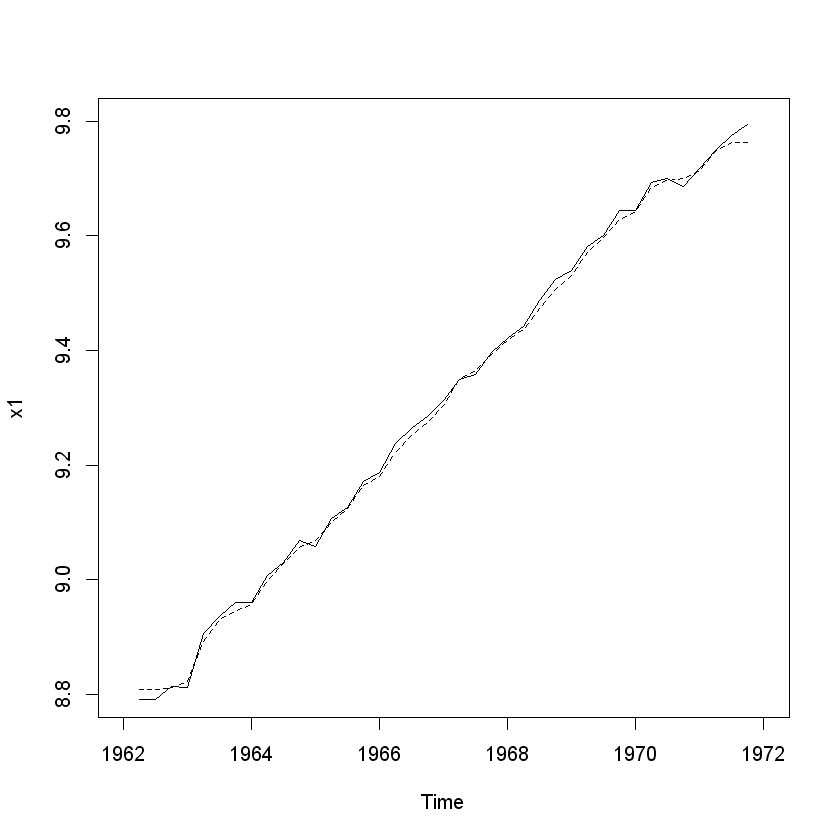

In [13]:
df["predict"] <- ts( predict(rf_result, df["time"]), start=c(1962,2), frequency=4)
plot(df["freeny.y"], ylim=c(8.8,9.8), xlim=c(1962,1972))
par(new=T)
plot(df["predict"], lty=2, ylim=c(8.8,9.8), xlim=c(1962,1972))